# <span style="color:lightgreen">ISB AMPBA 2024 Winter - Term 2</span> 
# <span style="color:lightgreen">Machine Learning - Supervised Learning 1 - Individual Assignment Solutions</span> 

## <span style="color:lightgreen">By - Anmol Gupta (PGID - 12320004)</span>

## Stage 1 - Importing Libraries & Dataset + Performing Exploratory Data Analysis

In [1]:
# Installing additional libraries for generating the decision tree
# !pip install pydotplus
# !conda install graphviz 

In [2]:
import numpy as np # Imports the numpy library
import pandas as pd # Imports the pandas library
import matplotlib.pyplot as plt  # Imports the plotting/visualization library
import warnings

from sklearn.model_selection import train_test_split # used to split the dataset into test and training datasets
from sklearn.preprocessing import LabelEncoder  # used to normalize the labels with a value between 0 and n_classes-1, for faster processing

from sklearn import tree # Decision tree based models for classification 
from sklearn.tree import DecisionTreeClassifier # Imports the non-parameteric Supervised Learning method of decision tree for classification

from sklearn.metrics import accuracy_score # Function used to calculate the accuracy score between predicted values and actual values

# Importing additional helper libraries for visualization of the decision tree
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from IPython.display import Image

# Some additional output formatting settings
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

warnings.filterwarnings("ignore")

In [3]:
# Please be wary that the below command will execute only if the dataset is in the same folder as the file, if executing on your local system.
# If executing in Google Colab, you can upload the dataset in the temporary files section
mushrooms = pd.read_csv('./mushrooms.csv') # Reading the given mushrooms dataset
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Retrieving the shape of the mushrooms dataset to realise the # of rows and columns
mushrooms.shape

(8124, 23)

In [5]:
mushrooms.info() # To confirm the existence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Describing the various columns of the mushrooms dataset
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# Calculating the count of records for each class, edible and poisonous
mushrooms.groupby('class')['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

### Creation of test and training datasets

In [8]:
## Separating features and target
X, y = mushrooms.drop(['class'], axis=1), mushrooms['class']

In [9]:
# Feature names
feature_names = list(X.columns)
feature_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [10]:
# Label encoding the target or class variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(y, y_encoded, sep='\n')

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object
[1 0 0 ... 0 1 0]


#### Hence, p (poisonous) is encoded as 1 and e (edible) is encoded as 0

In [11]:
# Label encoding the features
encoder = LabelEncoder()
X_encoded = pd.DataFrame()
for col in X.columns:
    X_encoded[col] = encoder.fit_transform(X[col])

print(X_encoded)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       

In [12]:
## Splitting the data into training and testing with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=1)

### Decision Tree Creation

In [58]:
# A helper function to fit a decision tree model based on the given data, size and purity
def get_dt_clf(X_train, y_train, size, purity):
    dt_clf = DecisionTreeClassifier(criterion='entropy', # Using the criterion as entropy as the problem statement mentions using information gain as the purity measure
                                    # Since, Information gain is nothing but the expected reduction in entropy 
                                        random_state=0,
                                        min_samples_split=size, # adjusting the min_samples_split parameter with varying size values
                                        min_samples_leaf=size,
                                        max_leaf_nodes=size,
                                        min_impurity_decrease=1 - purity*0.01,  # adjusting the min_impurity_decrease parameter with 1-purity*0.01 values
                                        # Since, the purity (or impurity in this case) is measured from 0 to 1. Subtracting from 1 since we are given purity values and the parameter is for impurity
                                        )
    # fitting the model
    dt_clf.fit(X_train, y_train)
    return dt_clf # Returing the model object

In [59]:
# Defining the various size and purity values in a separate array, to be used further as well
size_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
purity_values = [60, 65, 70, 75, 80, 85, 90, 95]

# Creating the driver function which takes in the train and test data, along with the various size/purity threshold values
def tree_sweep(train = (X_train, y_train), test = [X_test, y_test], size = size_values, purity = purity_values):

  tree_sweep = []

  # Enumerating through both size and purity to find the best combination for the most effective decision tree classifier
  for idx, s in enumerate(size):
    for p in purity: 
      
      # Calling the helper function which will return the model object
      dt_clf = get_dt_clf(train[0], train[1], s, p)

      # Making predictions based on the decision tree classifier
      y_pred = dt_clf.predict(test[0])

      #Predict the value using X train for accuracy comparision 
      y_pred_train = dt_clf.predict(train[0])

      #Determine the accuracy score for test data
      print(f'Model accuracy score with size = {s} and purity = {p} is: {accuracy_score(y_test, y_pred):0.4f}')
      
      #Accuracy Score for training set
      print(f'Training-set accuracy score: {accuracy_score(y_train, y_pred_train):0.4f}')
      
      print(f'Feature importances: {dt_clf.feature_importances_}')

      # Creating a 2D list which will be turned into a dataframe for further transformations and usage
      tree_sweep.append([s,p,accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)])
  
  # Returning the 2D list after converting it into a pandas DataFrame
  return pd.DataFrame(tree_sweep, columns=['size', 'purity', 'train-accuracy', 'test-accuracy'])

In [60]:
# Calling the tree_sweep function which will return a dataframe which the accuracy scores for each combination of size and purity threshold values
tree_sweep_results = tree_sweep([X_train, y_train], [X_test, y_test])

# Outputting the results to a csv
tree_sweep_results.to_csv('tree_sweep.csv',index=False)

Model accuracy score with size = 10 and purity = 60 is: 0.5070
Training-set accuracy score: 0.5227
Feature importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Model accuracy score with size = 10 and purity = 65 is: 0.5070
Training-set accuracy score: 0.5227
Feature importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Model accuracy score with size = 10 and purity = 70 is: 0.5070
Training-set accuracy score: 0.5227
Feature importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Model accuracy score with size = 10 and purity = 75 is: 0.9135
Training-set accuracy score: 0.9140
Feature importances: [0.     0.     0.     0.     0.     0.     0.     0.     0.4398 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.5602
 0.     0.    ]
Model accuracy score with size = 10 and purity = 80 is: 0.9135
Training-set accuracy score: 0.9140
Feature importances: [0.     0.     0.     0.     0.     0.    

In [62]:
# Obtaining the optimal values of size and purity based on the size/purity pair with the highest test accuracy metric
optimal_tree = tree_sweep_results.sort_values(by='test-accuracy', ascending=False).iloc[0,:]
optimal_tree # Printing the optimal tree details

size              40.000000
purity            95.000000
train-accuracy     0.954801
test-accuracy      0.962674
Name: 31, dtype: float64

In [63]:
# Creating two new variables for optimal size and optimal purity
optimal_size = int(optimal_tree['size'])
optimal_purity = int(optimal_tree['purity'])

In [64]:
# # Genrating rules based on the optimal size and purity values
# dt_clf_optimal = get_dt_clf(X_train, y_train, optimal_size, optimal_purity)

# # fit the model
# dt_clf_optimal.fit(X_train, y_train)

# #Plot the tree
# plt.figure(figsize=(12,8))

# tree.plot_tree(dt_clf_optimal.fit(X_train, y_train)) 

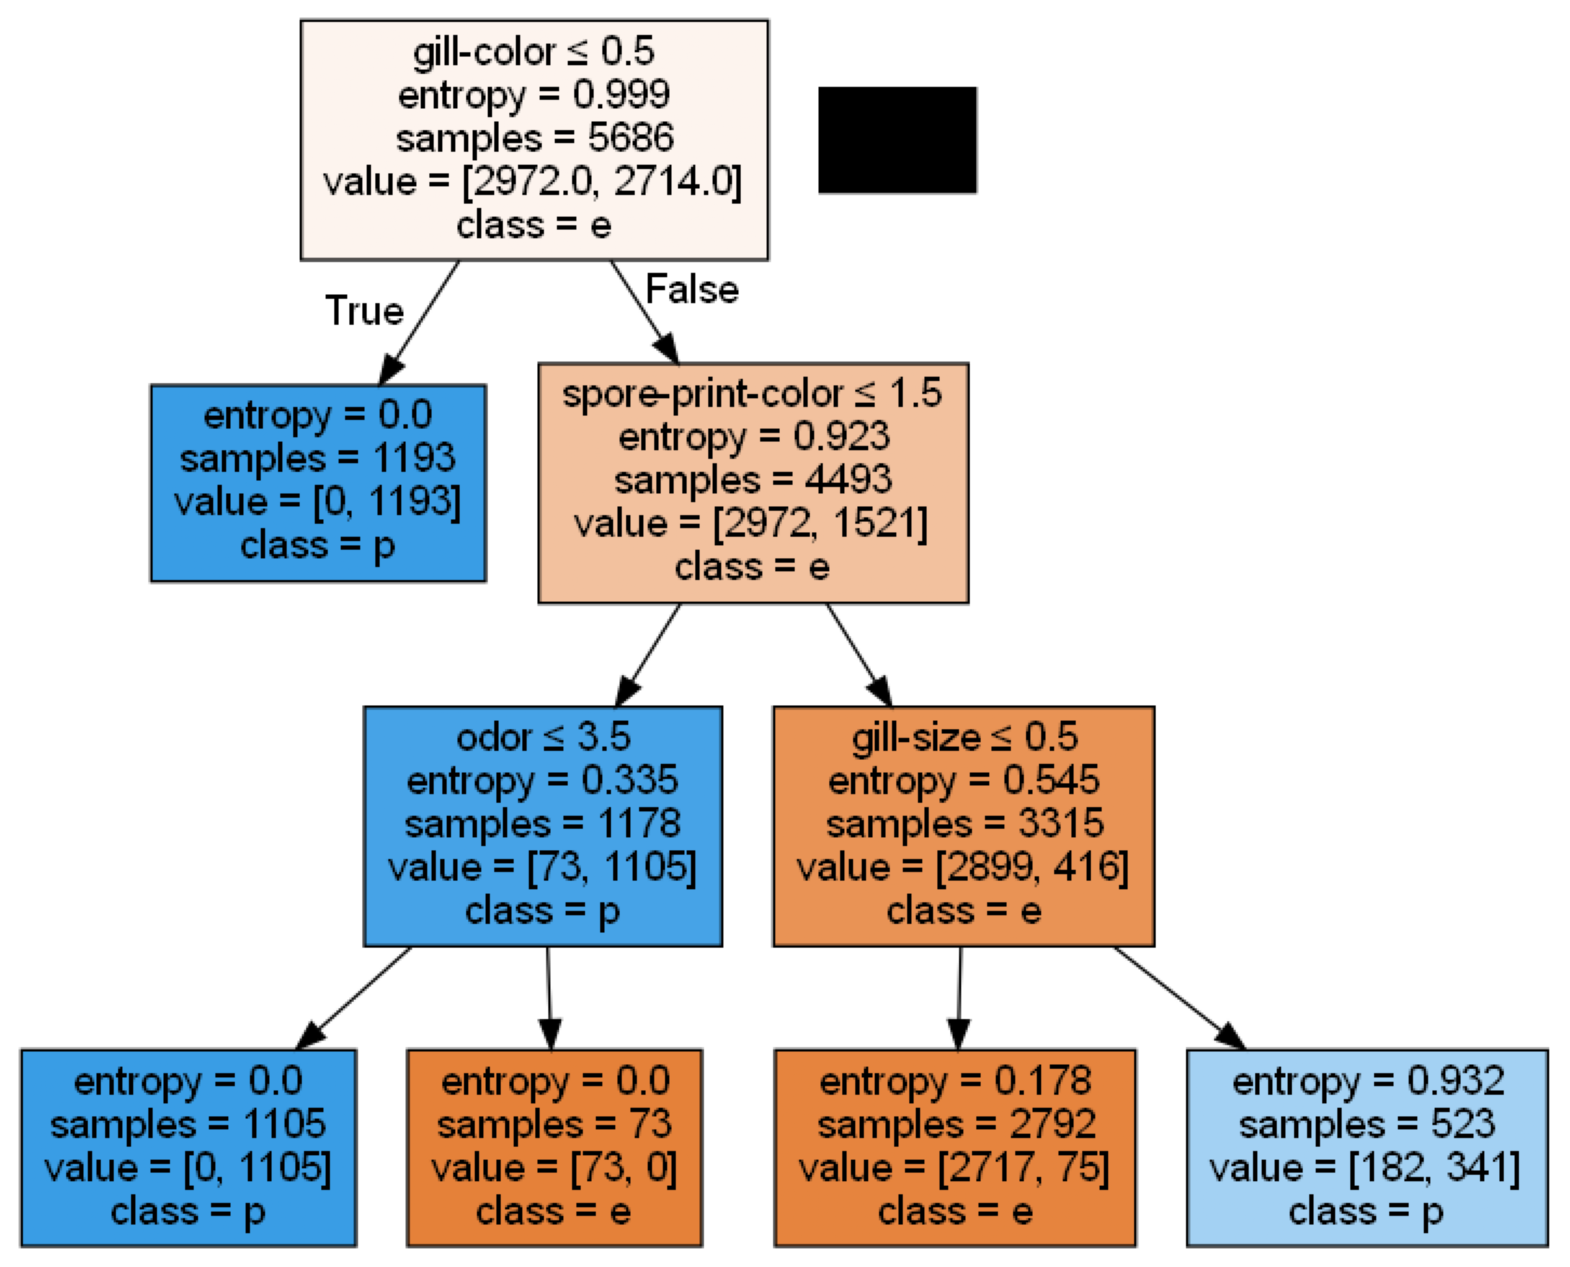

In [65]:
# Code to visualize the Decision Tree rules as a tree representation, with the given labels for each feature and prediction class 
fileName = "decision-tree-optimal.png"
dot_data = StringIO()
labelNames = mushrooms["class"].unique().tolist()

# Genrating rules based on the optimal size and purity values
dt_clf_optimal = get_dt_clf(X_train, y_train, optimal_size, optimal_purity)

# fit the model
dt_clf_optimal.fit(X_train, y_train)

# export_graphviz will convert decision tree classifier into dot file
tree.export_graphviz(dt_clf_optimal,feature_names = feature_names, out_file = dot_data,
                         class_names = np.unique(y), filled = True, special_characters = True, rotate = False) 

# Convert dot file int pgn using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
#write pgn into file
graph.write_png(fileName)

#display tree image
img_g = mpimg.imread(fileName)
plt.figure(figsize=(20, 40))
plt.imshow(img_g)
plt.axis('off')
plt.show()

#### For the optimal value of purity, plotting size vs train/test accuracy curves

In [20]:
accuracy_test = []
accuracy_train = []

# Obtaining the Decision tree accuracy results based on the optimal purity and varying size values, and storing them in a list
for x in size_values:
    decision_tree = get_dt_clf(X_train, y_train, x, optimal_purity)

    # predict lables using remaining testset
    pred_test = decision_tree.predict(X_test)
    
    # predict lables on the training set
    pred_train = decision_tree.predict(X_train)
    
    # Creating the accuracy score result arrays which will store the accuracy values for each pair of size and purity values
    accuracy_test.append(accuracy_score(y_test, pred_test)) 
    accuracy_train.append(accuracy_score(y_train, pred_train)) 
    
    print("Decision Trees's Accuracy (entropy) with size:", x , " is [Test:", accuracy_score(y_test, pred_test)," and Train:", accuracy_score(y_train, pred_train),"]")

Decision Trees's Accuracy (entropy) with size: 10  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 20  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 30  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 40  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 50  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 60  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 70  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 80  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]
Decision Trees's Accuracy (entropy) with size: 90  is [Test: 0.9626743232157506  and Train: 0.95

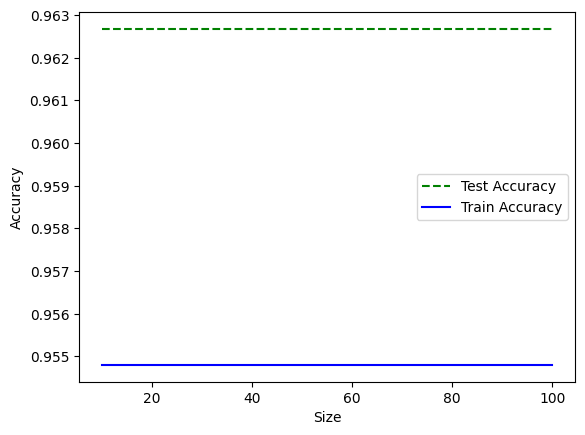

In [21]:
# Plotting the test/train accuracy scores for varying size thresholds and the optimal purity
plt.plot(size_values, accuracy_test, label='Test Accuracy',color='g', linestyle='--')
plt.plot(size_values, accuracy_train, label='Train Accuracy',color='b', linestyle='-')
plt.ylabel('Accuracy')
plt.xlabel('Size')
plt.legend()
plt.show()

#### For the optimal value of size, plotting purity vs train/test accuracy curves

In [22]:
accuracy_test = []
accuracy_train = []

# Decision tree accuracy results based on the optimal size and varying purity values
for x in purity_values:
    decision_tree = get_dt_clf(X_train, y_train, optimal_size, x)

    # predict lables using remaining testset
    pred_test = decision_tree.predict(X_test)
    
    # predict lables on the training set
    pred_train = decision_tree.predict(X_train)

    # Creating the accuracy score result arrays which will store the accuracy values for each pair of size and purity values
    accuracy_test.append(accuracy_score(y_test, pred_test)) 
    accuracy_train.append(accuracy_score(y_train, pred_train)) 
    
    print("Decision Trees's Accuracy (entropy) with purity:", x , " is [Test:", accuracy_score(y_test, pred_test)," and Train:", accuracy_score(y_train, pred_train),"]")

Decision Trees's Accuracy (entropy) with purity: 60  is [Test: 0.5069729286300246  and Train: 0.5226873021456209 ]
Decision Trees's Accuracy (entropy) with purity: 65  is [Test: 0.5069729286300246  and Train: 0.5226873021456209 ]
Decision Trees's Accuracy (entropy) with purity: 70  is [Test: 0.5069729286300246  and Train: 0.5226873021456209 ]
Decision Trees's Accuracy (entropy) with purity: 75  is [Test: 0.9134536505332239  and Train: 0.9139992965177629 ]
Decision Trees's Accuracy (entropy) with purity: 80  is [Test: 0.9134536505332239  and Train: 0.9139992965177629 ]
Decision Trees's Accuracy (entropy) with purity: 85  is [Test: 0.9134536505332239  and Train: 0.9139992965177629 ]
Decision Trees's Accuracy (entropy) with purity: 90  is [Test: 0.9532403609515997  and Train: 0.9419627154414351 ]
Decision Trees's Accuracy (entropy) with purity: 95  is [Test: 0.9626743232157506  and Train: 0.9548012662680267 ]


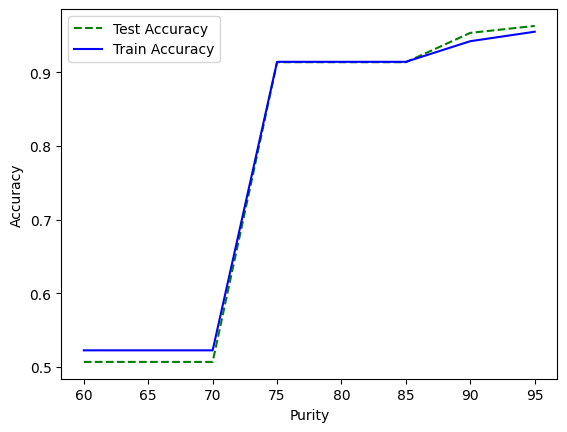

In [23]:
# Plotting the test/train accuracy scores for varying purity thresholds and the optimal size
plt.plot(purity_values, accuracy_test, label='Test Accuracy',color='g', linestyle='--')
plt.plot(purity_values, accuracy_train, label='Train Accuracy',color='b', linestyle='-')
plt.ylabel('Accuracy')
plt.xlabel('Purity')
plt.legend()
plt.show()

#### Observations for Problem 5

1. From the above results, we observe that the highest accuracy is achieved with a size of 100 and a purity of 95.
2. This makes sense, since purity is a much more decisive factor when determining whether a mushroom is edible. 
3. Therefore, the highest accuracy corresponds to the highest purity (or the lowest impurity). 
4. The decision tree predicts classes/decisions based on the features: gill-color, spore-print-color, odor, and gill-size. 
5. The size parameter does not significantly impact the tree's accuracy. However, as the purity parameter increases, the accuracy initially remains stable but then increases sharply when we increase the purity from 70 to 75, continuing to increase gradually until it nearly reaches 1 at a purity value of 95, with both test and train accuracy scores representing the same trajectory.